In [1]:
import os

# Display current workspace
current_working_directory = os.getcwd()
print("Aktuelles Arbeitsverzeichnis:", current_working_directory)


Aktuelles Arbeitsverzeichnis: /Users/henrikfliegel/Desktop/MD


## Install Dependencies

In [ ]:
pip install pandas

In [ ]:
pip install openpyxl

In [ ]:
pip install matplotlib

## Load Training Data

In [2]:
import pandas as pd

# Laden der Excel-Datei
excel_file = pd.ExcelFile('Fact_Forecast_GJ2023.XLSX')

# Excel-Datei enthält mehrere Tabellenblätter
sheet_names = excel_file.sheet_names  # Liste aller Tabellenblattnamen

print(sheet_names)

# Laden jedes Tabellenblatts in ein eigenes DataFrame
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

['Fact_202210_202309', 'Forecast 202205', 'Forecast 202206', 'Forecast 202207', 'Forecast 202208', 'Forecast 202209', 'Forecast 202210', 'Forecast 202211', 'Forecast 202212', 'Forecast 202301', 'Forecast 202302', 'Forecast 202303', 'Forecast 202304', 'Forecast 202305', 'Forecast 202306', 'Forecast 202307', 'Forecast 202308', 'Forecast 202309']


## Create Dataframes

### Helper-Functions

In [3]:
# Function to convert an integer-formatted date into a datetime object
def convert_int_to_datetime(int_date):
    # Add leading zeros to the integer to ensure it's in a consistent format
    date_str = f"{int_date:06d}"  
    # Reformat the string to a date in 'YYYY-MM' format with the first day of the month
    date_str = f"{date_str[:4]}-{date_str[4:]}-01"  
    # Convert the formatted string into a datetime object
    return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')

# Function to extract the machine type from a specified column in a DataFrame
def extract_maschinentyp(df, source_column):
    # Assumption is that the machine type is the first word in the string,
    # separated by a space from the rest of the string
    df['Maschinentyp'] = df[source_column].str.split('/').str[0]  # Split and take the first part

    return df

# Function to extract the sub-type from a specified column in a DataFrame
#def extract_subtype(df, source_column):
    # Assumption is that the sub-type is the second word in the string,
    # separated by a space from the rest of the string
    df['Subtype'] = df[source_column].str.split().str[0].str.split('/').str[1]

    return df

# Function to replace old machine type identifiers with new ones according to a mapping
def replace_machine_types(df, mapping):
    # Use the provided mapping to replace machine types,
    # falling back to the original if no mapping is found (using fillna)
    df['Maschinentyp'] = df['Maschinentyp'].map(mapping).fillna(df['Maschinentyp'])
    return df

# Dictionary of old machine type identifiers mapped to new ones
mapping = {
    'Type old': ['L02', 'L04', 'L05', 'L06', 'L07', 'L31', 'L32', 'L33', 'L34', 'L35', 
                 'L36', 'L37', 'L39', 'C02', 'C03', 'C04', 'C05', 'C07', 'C55', 'C59', 
                 'C65', 'C66', 'C73', 'C74', 'C75', 'C76'],
    'Type new': ['EVION', 'L53', 'L54', 'L55', 'L55', 'L54', 'EVION', 'EVION', 'L53', 'L54', 
                 'L55', 'L55', 'EVION', 'EVION', 'EVION', 'L53', 'L54', 'L55', 'C85', 'C86', 
                 'C85', 'C86', 'C83', 'C84', 'C85', 'C86']
}

# Create a DataFrame from the mapping dictionary
df_mapping = pd.DataFrame(mapping)

# Convert the mapping DataFrame into a dictionary for easy replacement
mapping_dict = dict(zip(df_mapping['Type old'], df_mapping['Type new']))

# List of allowed machine types
allowed_types = ['L53', 'L54', 'L55', 'C83', 'C84', 'C85', 'C86']


In [19]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('Fact_GJ2017_GJ2022.XLSX')

# Create a list to collect all DataFrames
all_dataframes = []

# Loop through all sheet names in the Excel file
for sheet_name in excel_file.sheet_names:
    # Load each sheet as a DataFrame
    df = excel_file.parse(sheet_name)
    # Add the DataFrame to the list
    all_dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Apply the function 'convert_int_to_datetime' to convert the 'Monat' column to a datetime format
combined_df['Monat'] = combined_df['Monat'].apply(convert_int_to_datetime)

# Extract the machine type from a specified column in the DataFrame
combined_df = extract_maschinentyp(combined_df, 'UTyp-Bezeichnung')

# Extract the sub-type from a specified column in the DataFrame
#combined_df = extract_subtype(combined_df, 'UTyp-Bezeichnung')

# Replace machine types based on the provided mapping dictionary
combined_df = replace_machine_types(combined_df, mapping_dict)

# Filter the DataFrame to keep only the allowed machine types
combined_df = combined_df[combined_df['Maschinentyp'].isin(allowed_types)]

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Get the total number of rows in the DataFrame
num_rows = len(combined_df)

# Display the total number of rows
print("Number of rows in the DataFrame:", num_rows)


   Claas-Planungsland Vertriebsregion Teil 2 Vertriebsregion Teil 4  Material  \
24                 ZA            6 Africa&ME         3 South AF Imp  20002040   
25                CPL            1 Middle EU                  3 CPL  20002040   
26                 RO            1 Middle EU              4 CRC Rom  20002040   
27                 FI            1 Middle EU              5 NEU Imp  20002040   
28                 AT            1 Middle EU              6 CRC Aus  20002040   

    CLAAS Untertyp SOP        UTyp-Bezeichnung      Monat  PG Fakt Ist  \
24                 110   C04/110 TUCANO 430 T3 2017-01-01            1   
25                 120  C04/120 TUCANO 420 T4f 2017-02-01            1   
26                 120  C04/120 TUCANO 420 T4f 2017-02-01            1   
27                 120  C04/120 TUCANO 420 T4f 2017-01-01            1   
28                 120  C04/120 TUCANO 420 T4f 2017-04-01            1   

   Maschinentyp  
24          L53  
25          L53  
26          L5

In [15]:
grouped_df = combined_df.groupby(['Maschinentyp', 'CLAAS Untertyp SOP', 'Monat'])

# Summiere die 'PG Fakt Ist' Spalte
result = grouped_df['PG Fakt Ist'].sum().reset_index()  # Verwende reset_index, um den Index zurückzusetzen



print(result)

     Maschinentyp  CLAAS Untertyp SOP      Monat  PG Fakt Ist
0             C83                 115 2019-06-01            2
1             C83                 115 2019-07-01            1
2             C83                 115 2020-04-01            9
3             C83                 115 2020-05-01            4
4             C83                 115 2020-06-01           31
...           ...                 ...        ...          ...
2277          L55                 845 2022-06-01            1
2278          L55                 845 2022-07-01            5
2279          L55                 845 2022-09-01            9
2280          L55                 846 2022-03-01            1
2281          L55                 846 2022-08-01            1

[2282 rows x 4 columns]


In [148]:
grouped_df = combined_df.groupby(['Maschinentyp', 'Monat'])

# Summiere die 'PG Fakt Ist' Spalte
mgdf = grouped_df['PG Fakt Ist'].sum().reset_index()  # Verwende reset_index, um den Index zurückzusetzen

mgdf.index = mgdf["Monat"]

mgdf['Year'] = mgdf.index.year  # Extrahieren des Jahres
mgdf['Month'] = mgdf.index.month  # Extrahieren des Monats
mgdf.drop('Monat', axis=1, inplace=True)

print(mgdf)

           Maschinentyp  PG Fakt Ist  Year  Month
Monat                                            
2016-11-01          C83            6  2016     11
2016-12-01          C83            1  2016     12
2017-01-01          C83            6  2017      1
2017-02-01          C83            5  2017      2
2017-03-01          C83            7  2017      3
...                 ...          ...   ...    ...
2022-05-01          L55           20  2022      5
2022-06-01          L55           34  2022      6
2022-07-01          L55           54  2022      7
2022-08-01          L55           36  2022      8
2022-09-01          L55           73  2022      9

[455 rows x 4 columns]


In [30]:
def df_to_X_y1(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
def df_to_X_y12(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [36]:
import numpy as np

WINDOW_SIZE = 12
X1, y1 = df_to_X_y(mgdf, WINDOW_SIZE)
X1.shape, y1.shape

((443, 12, 1, 3), (443, 3))

In [31]:
X1

array([[[['C83', Timestamp('2016-11-01 00:00:00'), 6]],

        [['C83', Timestamp('2016-12-01 00:00:00'), 1]],

        [['C83', Timestamp('2017-01-01 00:00:00'), 6]],

        ...,

        [['C83', Timestamp('2017-09-01 00:00:00'), 11]],

        [['C83', Timestamp('2017-12-01 00:00:00'), 1]],

        [['C83', Timestamp('2018-01-01 00:00:00'), 3]]],


       [[['C83', Timestamp('2016-12-01 00:00:00'), 1]],

        [['C83', Timestamp('2017-01-01 00:00:00'), 6]],

        [['C83', Timestamp('2017-02-01 00:00:00'), 5]],

        ...,

        [['C83', Timestamp('2017-12-01 00:00:00'), 1]],

        [['C83', Timestamp('2018-01-01 00:00:00'), 3]],

        [['C83', Timestamp('2018-02-01 00:00:00'), 4]]],


       [[['C83', Timestamp('2017-01-01 00:00:00'), 6]],

        [['C83', Timestamp('2017-02-01 00:00:00'), 5]],

        [['C83', Timestamp('2017-03-01 00:00:00'), 7]],

        ...,

        [['C83', Timestamp('2018-01-01 00:00:00'), 3]],

        [['C83', Timestamp('2018-02-01 00

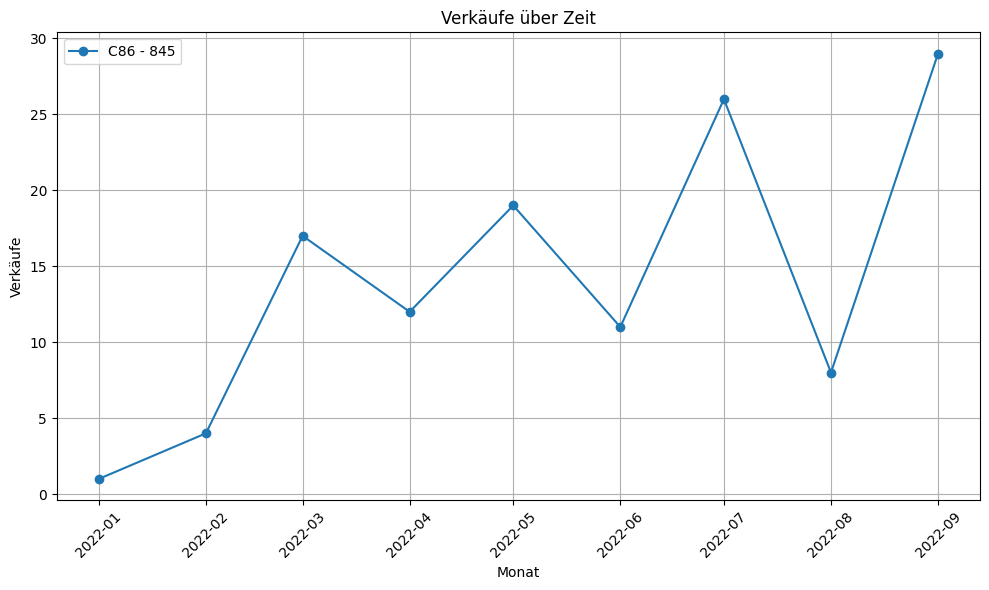

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_sales_timeseries(df, maschinentyp, untertyp):
    # Filtern des DataFrames basierend auf den Eingabeparametern
    filtered_df = df[
        (df['Maschinentyp'] == maschinentyp) &
        (df['CLAAS Untertyp SOP'] == untertyp) 
    ]

    # Sortieren nach dem 'Monat', um die Zeitreihe korrekt darzustellen
    filtered_df = filtered_df.sort_values(by='Monat')

    # Erstellung des Plots
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['Monat'], filtered_df['PG Fakt Ist'], marker='o', linestyle='-', label=f'{maschinentyp} - {untertyp}')
    plt.xlabel('Monat')
    plt.ylabel('Verkäufe')
    plt.title('Verkäufe über Zeit')
    plt.grid(True)
    plt.xticks(rotation=45)  # Dreht die x-Achse für bessere Lesbarkeit
    plt.legend()
    plt.tight_layout()  # Passt das Layout an, um Überlappungen zu vermeiden
    plt.show()

# Beispielaufruf der Funktion
plot_sales_timeseries(result, 'C86', 845)


In [16]:
len(combined_df['CLAAS Untertyp SOP'].unique())
#combined_df['Maschinentyp'].unique()


65

In [9]:
combined_df.loc[combined_df['Maschinentyp'] == 'C86', 'CLAAS Untertyp SOP'].unique()

array([820, 100, 200, 400, 500, 580, 800, 810, 135, 835, 845, 145, 865,
       843, 143, 945, 165, 965, 925, 935, 235, 225, 943, 933])

In [39]:
def get_unique_combinations(dataframe, column1, column2):
    # Entfernt Duplikate basierend auf 'Maschinentyp' und 'Untertyp'
    unique_combinations = dataframe.drop_duplicates(subset=[column1, column2])
    
    # Gibt die Kombinationen zurück
    combinations = unique_combinations[[column1, column2]]
    
    # Berechnet die Anzahl der Kombinationen
    num_combinations = len(combinations)
    
    return combinations, num_combinations

# Aufruf der Funktion
combinations, num_combinations = get_unique_combinations(combined_df, 'Maschinentyp', 'CLAAS Untertyp SOP')

print("Unique combinations:")
print(combinations)

print("Total number of unique combinations:", num_combinations)

Unique combinations:
     Maschinentyp  CLAAS Untertyp SOP
24            L53                 110
25            L53                 120
32            L53                 130
46            L54                 100
47            L54                 120
...           ...                 ...
5691          L55                 843
5709          L55                 126
5718          L55                 825
5731          L55                 833
5737          L55                 136

[156 rows x 2 columns]
Total number of unique combinations: 156


In [40]:
def get_unique_combinations(dataframe, column1, column2, column3):
    # Entfernt Duplikate basierend auf 'Maschinentyp' und 'Untertyp'
    unique_combinations = dataframe.drop_duplicates(subset=[column1, column2, column3])
    
    # Gibt die Kombinationen zurück
    combinations = unique_combinations[[column1, column2, column3]]
    
    # Berechnet die Anzahl der Kombinationen
    num_combinations = len(combinations)
    
    return combinations, num_combinations

# Aufruf der Funktion
combinations, num_combinations = get_unique_combinations(combined_df, 'Maschinentyp', 'CLAAS Untertyp SOP', "Claas-Planungsland")

print("Unique combinations:")
print(combinations)

print("Total number of unique combinations:", num_combinations)

Unique combinations:
     Maschinentyp  CLAAS Untertyp SOP Claas-Planungsland
24            L53                 110                 ZA
25            L53                 120                CPL
26            L53                 120                 RO
27            L53                 120                 FI
28            L53                 120                 AT
...           ...                 ...                ...
5760          L55                 825                CPL
5771          L55                 725                 FR
5780          L55                 845                 IT
5784          L55                 845                 NL
5785          L55                 145                 RO

[1180 rows x 3 columns]
Total number of unique combinations: 1180


## ML Data Set Creation

In [149]:
# One-Hot Encoding
df_one_hot = pd.get_dummies(mgdf, columns=['Maschinentyp'])
# Konvertiere boolesche Spalten in Integer
bool_columns = df_one_hot.columns[df_one_hot.dtypes == 'bool']  # Identifiziere boolesche Spalten
df_one_hot[bool_columns] = df_one_hot[bool_columns].astype(int)  # Konvertiere in Integer
df_one_hot.rename(columns={'PG Fakt Ist': 'Sales'}, inplace=True)


print("One-Hot Encoded DataFrame:")
print(df_one_hot)


One-Hot Encoded DataFrame:
            Sales  Year  Month  Maschinentyp_C83  Maschinentyp_C84  \
Monat                                                                
2016-11-01      6  2016     11                 1                 0   
2016-12-01      1  2016     12                 1                 0   
2017-01-01      6  2017      1                 1                 0   
2017-02-01      5  2017      2                 1                 0   
2017-03-01      7  2017      3                 1                 0   
...           ...   ...    ...               ...               ...   
2022-05-01     20  2022      5                 0                 0   
2022-06-01     34  2022      6                 0                 0   
2022-07-01     54  2022      7                 0                 0   
2022-08-01     36  2022      8                 0                 0   
2022-09-01     73  2022      9                 0                 0   

            Maschinentyp_C85  Maschinentyp_C86  Maschinentyp_L

In [168]:
def df_to_X_y1(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

WINDOW_SIZE = 12
X1, y1 = df_to_X_y1(df_one_hot, WINDOW_SIZE)
X1.shape, y1.shape

((443, 12, 10), (443,))

In [132]:
X_train1, y_train1 = X1[:431], y1[:431]
X_val1, y_val1 = X1[431:], y1[431:]
#X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape # , X_test1.shape, y_test1.shape

((431, 12, 10), (431,), (12, 12, 10), (12,))

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model3 = Sequential()
model3.add(InputLayer((12, 10)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 64)             │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,121 (59.07 KB)

 Trainable params: 15,121 (59.07 KB)

 Non-trainable params: 0 (0.00 B)

In [201]:
cp3 = ModelCheckpoint('model3/best_model.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [206]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=5000, callbacks=[cp3])

Epoch 1/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 409.1494 - root_mean_squared_error: 20.2038 - val_loss: 302.7032 - val_root_mean_squared_error: 17.3984
Epoch 2/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 389.1098 - root_mean_squared_error: 19.6652 - val_loss: 319.0112 - val_root_mean_squared_error: 17.8609
Epoch 3/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 455.7212 - root_mean_squared_error: 21.3201 - val_loss: 310.9474 - val_root_mean_squared_error: 17.6337
Epoch 4/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 455.6282 - root_mean_squared_error: 21.2657 - val_loss: 331.7740 - val_root_mean_squared_error: 18.2147
Epoch 5/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 411.7449 - root_mean_squared_error: 20.2412 - val_loss: 301.0305 - val_root_mean_squared_error: 17.3502
Epoch 6/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 481.1093 - root_mean_squared_error: 21.8888 - val_loss: 328.6580 - val_root_mean_squared_error: 18.1289
Epoch 7/5000
14/

## Evaluation Data

In [82]:
import pandas as pd

# Laden der Excel-Datei
excel_file = pd.ExcelFile('Fact_Forecast_GJ2023.XLSX')

# Excel-Datei enthält mehrere Tabellenblätter
sheet_names = excel_file.sheet_names  # Liste aller Tabellenblattnamen

print(sheet_names)

# Laden jedes Tabellenblatts in ein eigenes DataFrame
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

['Fact_202210_202309', 'Forecast 202205', 'Forecast 202206', 'Forecast 202207', 'Forecast 202208', 'Forecast 202209', 'Forecast 202210', 'Forecast 202211', 'Forecast 202212', 'Forecast 202301', 'Forecast 202302', 'Forecast 202303', 'Forecast 202304', 'Forecast 202305', 'Forecast 202306', 'Forecast 202307', 'Forecast 202308', 'Forecast 202309']


In [83]:
sales = dataframes['Fact_202210_202309']
sales

,Claas-Planungsland,Maschinentyp,Untertyp,Produkt,Versanddatum
0,DK,L54,125,TRION 650,2022-10-04
1,FR,L54,115,TRION 640 Location,2022-10-04
2,COA,L55,834,TRION 740 TERRA TRAC - Tier 4,2022-10-05
3,COA,L55,834,TRION 740 TERRA TRAC - Tier 4,2022-10-05
4,COA,L55,834,TRION 740 TERRA TRAC - Tier 4,2022-10-05
...,...,...,...,...,...
4703,AR,L55,143,TRION 750 - Stage II,2023-09-28
4704,IT,L53,125,TRION 530,2023-09-29
4705,ES,C84,125,LEXION 6700,2023-09-29
4706,ES,C83,835,LEXION 5500 TERRA TRAC,2023-09-29


In [106]:
sales['Versanddatum'] = pd.to_datetime(sales['Versanddatum'])

grouped = sales.groupby(['Maschinentyp', sales['Versanddatum'].dt.to_period('M')])
sales_gr = grouped.size().reset_index(name='Anzahl')
sales_gr.rename(columns={'Versanddatum': 'Monat'}, inplace=True)

print(sales_gr)

   Maschinentyp    Monat  Anzahl
0           C83  2022-10       7
1           C83  2022-11      20
2           C83  2022-12      14
3           C83  2023-01      32
4           C83  2023-02      27
..          ...      ...     ...
79          L55  2023-05     112
80          L55  2023-06     112
81          L55  2023-07      57
82          L55  2023-08      18
83          L55  2023-09      35

[84 rows x 3 columns]


## Predict Model

In [166]:

# Bedingtes Filtern nach Datum und Maschinentyp
df_filtered_ma = df_one_hot[(df_one_hot['Maschinentyp_C86'] == 1)]

last_12_sorted = df_filtered_ma.tail(12)


# Sortieren nach Datum
df_filtered = df_filtered.sort_values(by='Monat')

last_12_sorted.head(20)

,Sales,Year,Month,Maschinentyp_C83,Maschinentyp_C84,Maschinentyp_C85,Maschinentyp_C86,Maschinentyp_L53,Maschinentyp_L54,Maschinentyp_L55
Monat,,,,,,,,,,
2021-07-01,1,2021,7,0,0,0,1,0,0,0
2021-11-01,1,2021,11,0,0,0,1,0,0,0
2021-12-01,2,2021,12,0,0,0,1,0,0,0
2022-01-01,13,2022,1,0,0,0,1,0,0,0
2022-02-01,19,2022,2,0,0,0,1,0,0,0
2022-03-01,54,2022,3,0,0,0,1,0,0,0
2022-04-01,57,2022,4,0,0,0,1,0,0,0
2022-05-01,87,2022,5,0,0,0,1,0,0,0
2022-06-01,80,2022,6,0,0,0,1,0,0,0


In [175]:
# Funktion zur Erstellung einer verketteten Liste im Format (12, 10)
def create_linked_list(df, expected_shape=(12, 10)):
    # Konvertiere den DataFrame in ein NumPy-Array
    df_as_np = df.to_numpy()

    # Vergewissere dich, dass der DataFrame genügend Zeilen für die erwartete Form hat
    if df_as_np.shape[0] < expected_shape[0] or df_as_np.shape[1] < expected_shape[1]:
        raise ValueError("Der DataFrame hat nicht genügend Zeilen oder Spalten.")

    # Erstelle eine verkettete Liste mit den Zeilen des DataFrames
    linked_list = []

    # Schleife über die Zeilen und füge sie der Liste hinzu
    for row in df_as_np:
        linked_list.append(list(row))  # Umwandlung der Zeile in eine Liste

    # Nur die ersten 12 Zeilen verwenden, um das erwartete Format zu erhalten
    linked_list = linked_list[:expected_shape[0]]

    # Vergewissere dich, dass die verkettete Liste die richtige Form hat
    if len(linked_list) != expected_shape[0]:
        raise ValueError("Die verkettete Liste hat nicht die richtige Anzahl an Zeilen.")

    return linked_list

# Verwendung der Funktion, um die verkettete Liste zu erstellen
result = create_linked_list(last_12_sorted)

print("Verkettete Liste im Format (12, 10):")
for item in result:
    print(item)

Verkettete Liste im Format (12, 10):
[1, 2021, 7, 0, 0, 0, 1, 0, 0, 0]
[1, 2021, 11, 0, 0, 0, 1, 0, 0, 0]
[2, 2021, 12, 0, 0, 0, 1, 0, 0, 0]
[13, 2022, 1, 0, 0, 0, 1, 0, 0, 0]
[19, 2022, 2, 0, 0, 0, 1, 0, 0, 0]
[54, 2022, 3, 0, 0, 0, 1, 0, 0, 0]
[57, 2022, 4, 0, 0, 0, 1, 0, 0, 0]
[87, 2022, 5, 0, 0, 0, 1, 0, 0, 0]
[80, 2022, 6, 0, 0, 0, 1, 0, 0, 0]
[106, 2022, 7, 0, 0, 0, 1, 0, 0, 0]
[40, 2022, 8, 0, 0, 0, 1, 0, 0, 0]
[97, 2022, 9, 0, 0, 0, 1, 0, 0, 0]


In [216]:
# Funktion zur Fortschreibung von Jahr und Monat
def increment_month(year, month):
    month += 1
    if month > 12:
        year += 1
        month = 1
    return year, month

# Rekursive Vorhersagefunktion mit Beibehaltung des Maschinentyps
def recursive_predict_with_preserved_type(model, initial_sequence, num_steps):
    predictions = []
    
    # Sicherstellen, dass die Eingabesequenz ein NumPy-Array ist
    if not isinstance(initial_sequence, np.ndarray):
        initial_sequence = np.array(initial_sequence)
    
    current_input = initial_sequence.copy()

    for _ in range(num_steps):
        # Mach eine Vorhersage
        #print(current_input[-1])
        print(current_input)
        prediction = model.predict(np.expand_dims(current_input, axis=0))[0, 0]
        predictions.append(prediction)

        # Aktualisiere das Datum
        last_year = current_input[-1, 1]  # Letztes Jahr in der Sequenz
        last_month = current_input[-1, 2]  # Letzter Monat in der Sequenz
        new_year, new_month = increment_month(last_year, last_month)

        # Beibehalten des Maschinentyps
        last_type = current_input[-1, 3:]  # One-Hot-encoded Maschinentyp-Spalten

        # Aktualisiere die Eingabesequenz
        current_input = np.roll(current_input, -1, axis=0)
        
        # Neue Zeile, die die Vorhersage, das neue Datum und den beibehaltenen Maschinentyp enthält
        current_input[-1] = [prediction, new_year, new_month] + list(last_type)  # Aktualisiere das Datum und den Maschinentyp

    return predictions

# Beispiel für eine Eingabesequenz
initial_sequence = result

# Vorhersagen für die nächsten 12 Zeitschritte
num_steps = 12
predictions = recursive_predict_with_preserved_type(model3, initial_sequence, num_steps)

print("Rekursive Vorhersagen mit Jahr und Monat:")
print(predictions)

[[   1 2021    7    0    0    0    1    0    0    0]
 [   1 2021   11    0    0    0    1    0    0    0]
 [   2 2021   12    0    0    0    1    0    0    0]
 [  13 2022    1    0    0    0    1    0    0    0]
 [  19 2022    2    0    0    0    1    0    0    0]
 [  54 2022    3    0    0    0    1    0    0    0]
 [  57 2022    4    0    0    0    1    0    0    0]
 [  87 2022    5    0    0    0    1    0    0    0]
 [  80 2022    6    0    0    0    1    0    0    0]
 [ 106 2022    7    0    0    0    1    0    0    0]
 [  40 2022    8    0    0    0    1    0    0    0]
 [  97 2022    9    0    0    0    1    0    0    0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[   1 2021   11    0    0    0    1    0    0    0]
 [   2 2021   12    0    0    0    1    0    0    0]
 [  13 2022    1    0    0    0    1    0    0    0]
 [  19 2022    2    0    0    0    1    0    0    0]
 [  54 2022    3    0    0    0    1    0    0    0]
 [  57 2022    4    0    0    0    1    0    0    0]
 [  87 

In [213]:
print(sales_gr[sales_gr["Maschinentyp"] == "C86"])

        Maschinentyp  Anzahl  Year  Month
Monat                                    
2022-10          C86      32  2022     10
2022-11          C86      63  2022     11
2022-12          C86      64  2022     12
2023-01          C86     119  2023      1
2023-02          C86      86  2023      2
2023-03          C86      91  2023      3
2023-04          C86     109  2023      4
2023-05          C86     158  2023      5
2023-06          C86     181  2023      6
2023-07          C86     100  2023      7
2023-08          C86      50  2023      8
2023-09          C86      47  2023      9


In [1]:
import pandas as pd

# Datei einlesen
df = pd.read_csv('External_data_csv/df_rain.csv')

# DataFrame anzeigen
print(df)


      Jahr  Monat  Deutschland
0     1881      1         28.7
1     1882      1         25.8
2     1883      1         42.2
3     1884      1         68.4
4     1885      1         24.2
...    ...    ...          ...
1717  2019     12         58.8
1718  2020     12         57.5
1719  2021     12         61.4
1720  2022     12         67.1
1721  2023     12        120.4

[1722 rows x 3 columns]


In [6]:
import pandas as pd

# Datei einlesen
df = pd.read_csv('External_data_csv/df_rain.csv')

filtered_df = df[df['Jahr'] >= 2014]

# Sortiere die gefilterten Daten nach Jahr
sorted_df = filtered_df.sort_values(by=['Jahr', 'Monat'])

# Speichere die sortierten Daten in einer Excel-Datei
sorted_df.to_excel('External_data/rain.xlsx', index=False)

# Optional: Ausgabe der gefilterten und sortierten Daten anzeigen
print(sorted_df)

     Jahr  Monat  Deutschland
133  2014      1         44.9
277  2014      2         32.1
421  2014      3         18.6
565  2014      4         42.4
709  2014      5         90.4
..    ...    ...          ...
287  2024      2         81.1
431  2024      3         45.8
575  2024      4         64.4
719  2024      5        117.8
863  2024      6         89.2

[126 rows x 3 columns]


In [7]:
import pandas as pd

# Datei einlesen
df = pd.read_csv('External_data_csv/df_temp.csv')

filtered_df = df[df['Jahr'] >= 2014]

# Sortiere die gefilterten Daten nach Jahr
sorted_df = filtered_df.sort_values(by=['Jahr', 'Monat'])

# Speichere die sortierten Daten in einer Excel-Datei
sorted_df.to_excel('External_data/temp.xlsx', index=False)

# Optional: Ausgabe der gefilterten und sortierten Daten anzeigen
print(sorted_df)

     Jahr  Monat  Deutschland
133  2014      1         2.12
277  2014      2         4.34
421  2014      3         6.94
565  2014      4        10.77
709  2014      5        12.40
..    ...    ...          ...
287  2024      2         6.58
431  2024      3         7.48
575  2024      4        10.07
719  2024      5        15.05
863  2024      6        16.76

[126 rows x 3 columns]
